In [1]:
import sklearn
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
cd "/content/drive/MyDrive/Data_AI_k20"

/content/drive/.shortcut-targets-by-id/1nMZkJtIkGK4puvqF_kUXAhOn-ehS3fpf/Data_AI_k20


In [4]:
ls

Ai/    Han/    LamVu/   phi/   Tan/   Thoai/
Dang/  Hoang/  Nguyen/  Phuc/  Tanh/  Thuong/


In [5]:
# preprocessing
link = "/content/drive/MyDrive/Data_AI_k20/"
face_names = os.listdir(link)
face_path = []
for face_name in face_names:
  face_path.append(os.path.join(link, face_name))
print(face_names)
X = []
y = []
for i in range(len(face_path)):
  print(face_names[i])
  img_path = list(Path(face_path[i]).glob("*"))
  for j in img_path:
    img = plt.imread(j)
    img = cv2.resize(img, (128, 128))
    img.astype('float32')
    img = img/255
    X.append(img)
    y.append(i)

['Tan', 'Thoai', 'Ai', 'Thuong', 'Phuc', 'Tanh', 'Hoang', 'phi', 'LamVu', 'Han', 'Nguyen', 'Dang']
Tan
Thoai
Ai
Thuong
Phuc
Tanh
Hoang
phi
LamVu
Han
Nguyen
Dang


In [6]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(1157, 128, 128, 3)
(1157,)


In [7]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(1157, 12)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from keras import models, layers
from keras.layers import Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils 
model = models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding = 'same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten(input_shape=[128, 128, 3]))
model.add(Dense(1000, activation='relu'))
model.add(Dense(3000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(len(face_names), activation='softmax'))
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)     

In [15]:
model.fit(X_train, y_train, epochs=400, batch_size=128)

Epoch 1/400
8/8 [==============================] - 11s 128ms/step - loss: 6.5256 - accuracy: 0.2238
Epoch 2/400
8/8 [==============================] - 1s 83ms/step - loss: 4.3828 - accuracy: 0.3816
Epoch 3/400
8/8 [==============================] - 1s 82ms/step - loss: 1.9744 - accuracy: 0.4119
Epoch 4/400
8/8 [==============================] - 1s 82ms/step - loss: 1.6290 - accuracy: 0.4227
Epoch 5/400
8/8 [==============================] - 1s 81ms/step - loss: 1.3055 - accuracy: 0.5492
Epoch 6/400
8/8 [==============================] - 1s 81ms/step - loss: 1.1561 - accuracy: 0.6162
Epoch 7/400
8/8 [==============================] - 1s 80ms/step - loss: 0.8391 - accuracy: 0.7103
Epoch 8/400
8/8 [==============================] - 1s 81ms/step - loss: 0.7010 - accuracy: 0.7730
Epoch 9/400
8/8 [==============================] - 1s 81ms/step - loss: 0.2930 - accuracy: 0.9059
Epoch 10/400
8/8 [==============================] - 1s 82ms/step - loss: 0.2071 - accuracy: 0.9362
Epoch 11/400
8/8 

201/232
1/1 [==============================] - 0s 16ms/step
Predict: Thoai  (100%)
True_label:  Thoai


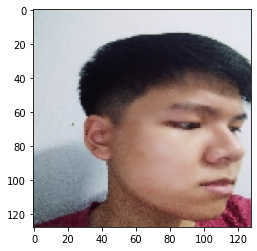

In [27]:
n = 201
print(f'{n}/{len(y_test)}')
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 128, 128, 3)))
print(f'Predict: {face_names[pred.argmax()]}  ({int(pred[0][pred.argmax()]*100)}%)')
print('True_label: ', face_names[y_test[n].argmax()])